In [1]:
library(reshape2)
library(ggplot2)

In [55]:
# loading the train and test dataset
train <- read.csv("Task1B_train.csv")
test <- read.csv("Task1B_test.csv")


# selecting the first four columns
train.data <- train[,-5]
test.data<-test[,-5]

# selecting the last column as label
train.label<-train[,5]
test.label<-test[,5]


3.I

In [48]:
# defining a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    # creating an empty matrix with rows equal to the number of datasets and col equal to size of subsets
    indx <- matrix(nrow=times, ncol=sample.size)
    # each time
    for (t in 1:times){
        # generating sample indexes
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

# the average function will return the average of the average of the neighbors’ values
average <- function(x){
    mean(x)
}
# knn regression function using manhattan distance function
knn <- function(train.data, train.label, test.data, K=3,distance="manhattan"){
    
    # converting the train and test data set to matrix for dist calculation
    train.data<-as.matrix(train.data)
    test.data<-as.matrix(test.data)
    
    # length of test samples
    test.len <- nrow(test.data)
    # length of train samples
    train.len <- nrow(train.data)
        
    # calculate distance among the samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    # creating an empty vector of prediction labels
    pred.label<-vector()
    # each test sample
    for (i in 1:test.len){
        # sorting the manhattan distance to find its K nearest neighbours 
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        # useing average function for predicting labels
        pred.label[i]<- (average(train.label[nn]))
    }
    
    # returning the predicted labels
    return (pred.label)
}
# error function
error<-function(test.label,knn.label){
    #  standard error of the estimate
    sqrt(sum((test.label-knn.label)^2)/length(test.label))
}

# Bootstrapping initial parameters

K <- 15           # Maximum K for KNN 
L <- 50           # number of datasets
N <- 20          # size of datasets

# generating bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K' = 1:K, 'L' = 1:L, 'error' = rep(0, L*K))


# for every k values
for (k in 1: K){
    
    # for every subset sizes:
    for (l in 1:L){
        
        # calculating the index i for error
        i <- (k-1) * L+l
        
        # calculating iteration index i by bootstrap
        indx <- boot.indx[l,]
        
        # saving the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        # calculating and recording the  missclassification rates through the error function above
        miss[i,'error'] <-error(test.label,knn(train.data[indx,], train.label[indx], test.data, K=k))
    } 
}

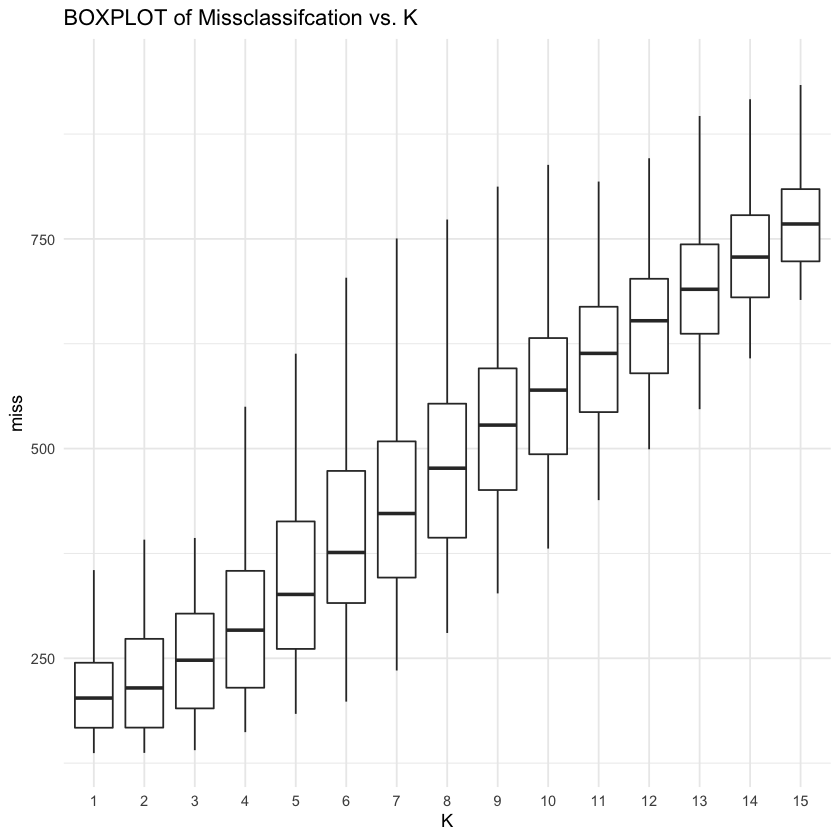

In [54]:
# plotting the errors
ggplot(data=miss, aes(factor(K), miss)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    labs(x='K', title='BOXPLOT of Missclassifcation vs. K') +
    theme_minimal()

# ignoring the warnings (because of ignoring outliers)
options(warn=-1)

3.III

Both the error and the uncertainity are increasing with the increase in K value.
With increase in error with each K value, the average value of the error also increase (which is quite obvious and can be seen from the graph). The uncertainity can be seen increasing as the upper and lower hinge difference increases (or in another word the whisker is increasing).


3.IV

In [58]:
# defining a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    # creating an empty matrix with rows equal to the number of datasets and col equal to size of subsets
    indx <- matrix(nrow=times, ncol=sample.size)
    # each time
    for (t in 1:times){
        # generating sample indexes
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

# the average function will return the average of the average of the neighbors’ values
average <- function(x){
    mean(x)
}
# knn regression function using manhattan distance function
knn <- function(train.data, train.label, test.data, K=3,distance="manhattan"){
    
    # converting the train and test data set to matrix for dist calculation
    train.data<-as.matrix(train.data)
    test.data<-as.matrix(test.data)
    
    # length of test samples
    test.len <- nrow(test.data)
    # length of train samples
    train.len <- nrow(train.data)
        
    # calculate distance among the samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    # creating an empty vector of prediction labels
    pred.label<-vector()
    # each test sample
    for (i in 1:test.len){
        # sorting the manhattan distance to find its K nearest neighbours 
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        # useing average function for predicting labels
        pred.label[i]<- (average(train.label[nn]))
    }
    
    # returning the predicted labels
    return (pred.label)
}
# error function
error<-function(test.label,knn.label){
    #  standard error of the estimate
    sqrt(sum((test.label-knn.label)^2)/length(test.label))
}

# Bootstrapping initial parameters

K <- 5           # Maximum K for KNN 
L <- 50           # number of datasets
# using seq function to generate sequences from 5 to 75 by 5 as per question
N <-seq(5,75,by=5) # sizes of subsets

# a dataframe to track the number of missclassified samples in each subsets
miss.diff.size <- data.frame('N' = N,'L' = 1:L, 'error' = rep(0,L*length(N)))

# here instead of each k value, we use each subsets
# for every subset datasets:
for (size in 1:length(N)){
    
    # generating bootstrap indices:
    boot.indx <- boot(nrow(train.data), N[size], L)
    
    # for every dataset 
    for (l in 1:L){
        
        # calculating the index i for error
        i <- (size-1)*L+l
        
        # calculating iteration index i by bootstrap
        indx <- boot.indx[l,]
        
        # saving the value of k and l
        miss.diff.size[i,'L'] <- l
        miss.diff.size[i,'N'] <- N[size]
                
        # calculate and record the test error
        miss.diff.size[i,'error'] <-error(test.label,knn(train.data[indx,], train.label[indx], test.data, K=K))
    } 
}

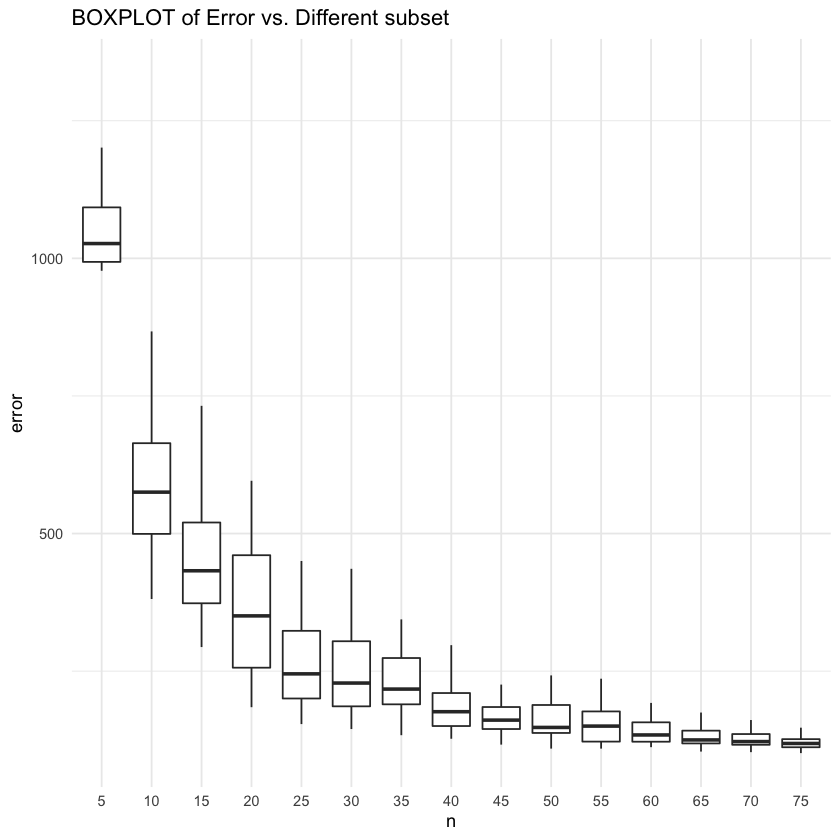

In [61]:
ggplot(data=miss.diff.size, aes(factor(N),error)) + 
    geom_boxplot(outlier.shape = NA)  +     
    labs(x="n",title='BOXPLOT of Error vs. Different subset') + 
    theme_minimal()

# ignoring the warnings (because of ignoring outliers)
options(warn=-1)

3.V

We can see complete opposite scenario here. With the increase in subset sizes, the error also decreses. The uncertainity can also be seen decreasing as well as the whisker becomes shorter. Finally the average value of the error saturates when the subset size is between 65 to 75 (i.e. error saturates with more and more size of subsets).